In [97]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import image classification libraries
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

## 1 Exploratory data analysis

### 1.1 Importing data

In [98]:
# load dataset
train = pd.read_csv('data\\train.csv')
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


### 1.2 Data overview

In [99]:
train.shape

(76518, 38)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [101]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


## 2 Missing values

In [102]:
# drop the id column
train.drop('id', axis=1, inplace=True)

In [103]:
# display all the columns with missing values
train.isnull().sum() # no missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

## 3 Encoding

In [104]:
# display the columns that are object
train.select_dtypes('object').columns

Index(['Target'], dtype='object')

In [105]:
# display the values in target column
train['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [106]:
# encode the target column with 0, 1 and 2
train['Target'] = train['Target'].map({'Graduate': 2, 'Dropout': 0, 'Enrolled': 1})
train['Target'].value_counts()

Target
2    36282
0    25296
1    14940
Name: count, dtype: int64

## 4 Outliers

### 4.1 Graphs

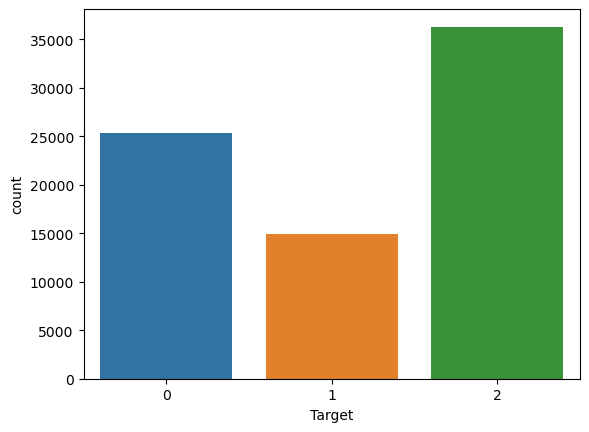

In [107]:
# plot a histogram of target
sns.countplot(x='Target', data=train)
plt.show()

### 4.2 Irrelevant columns

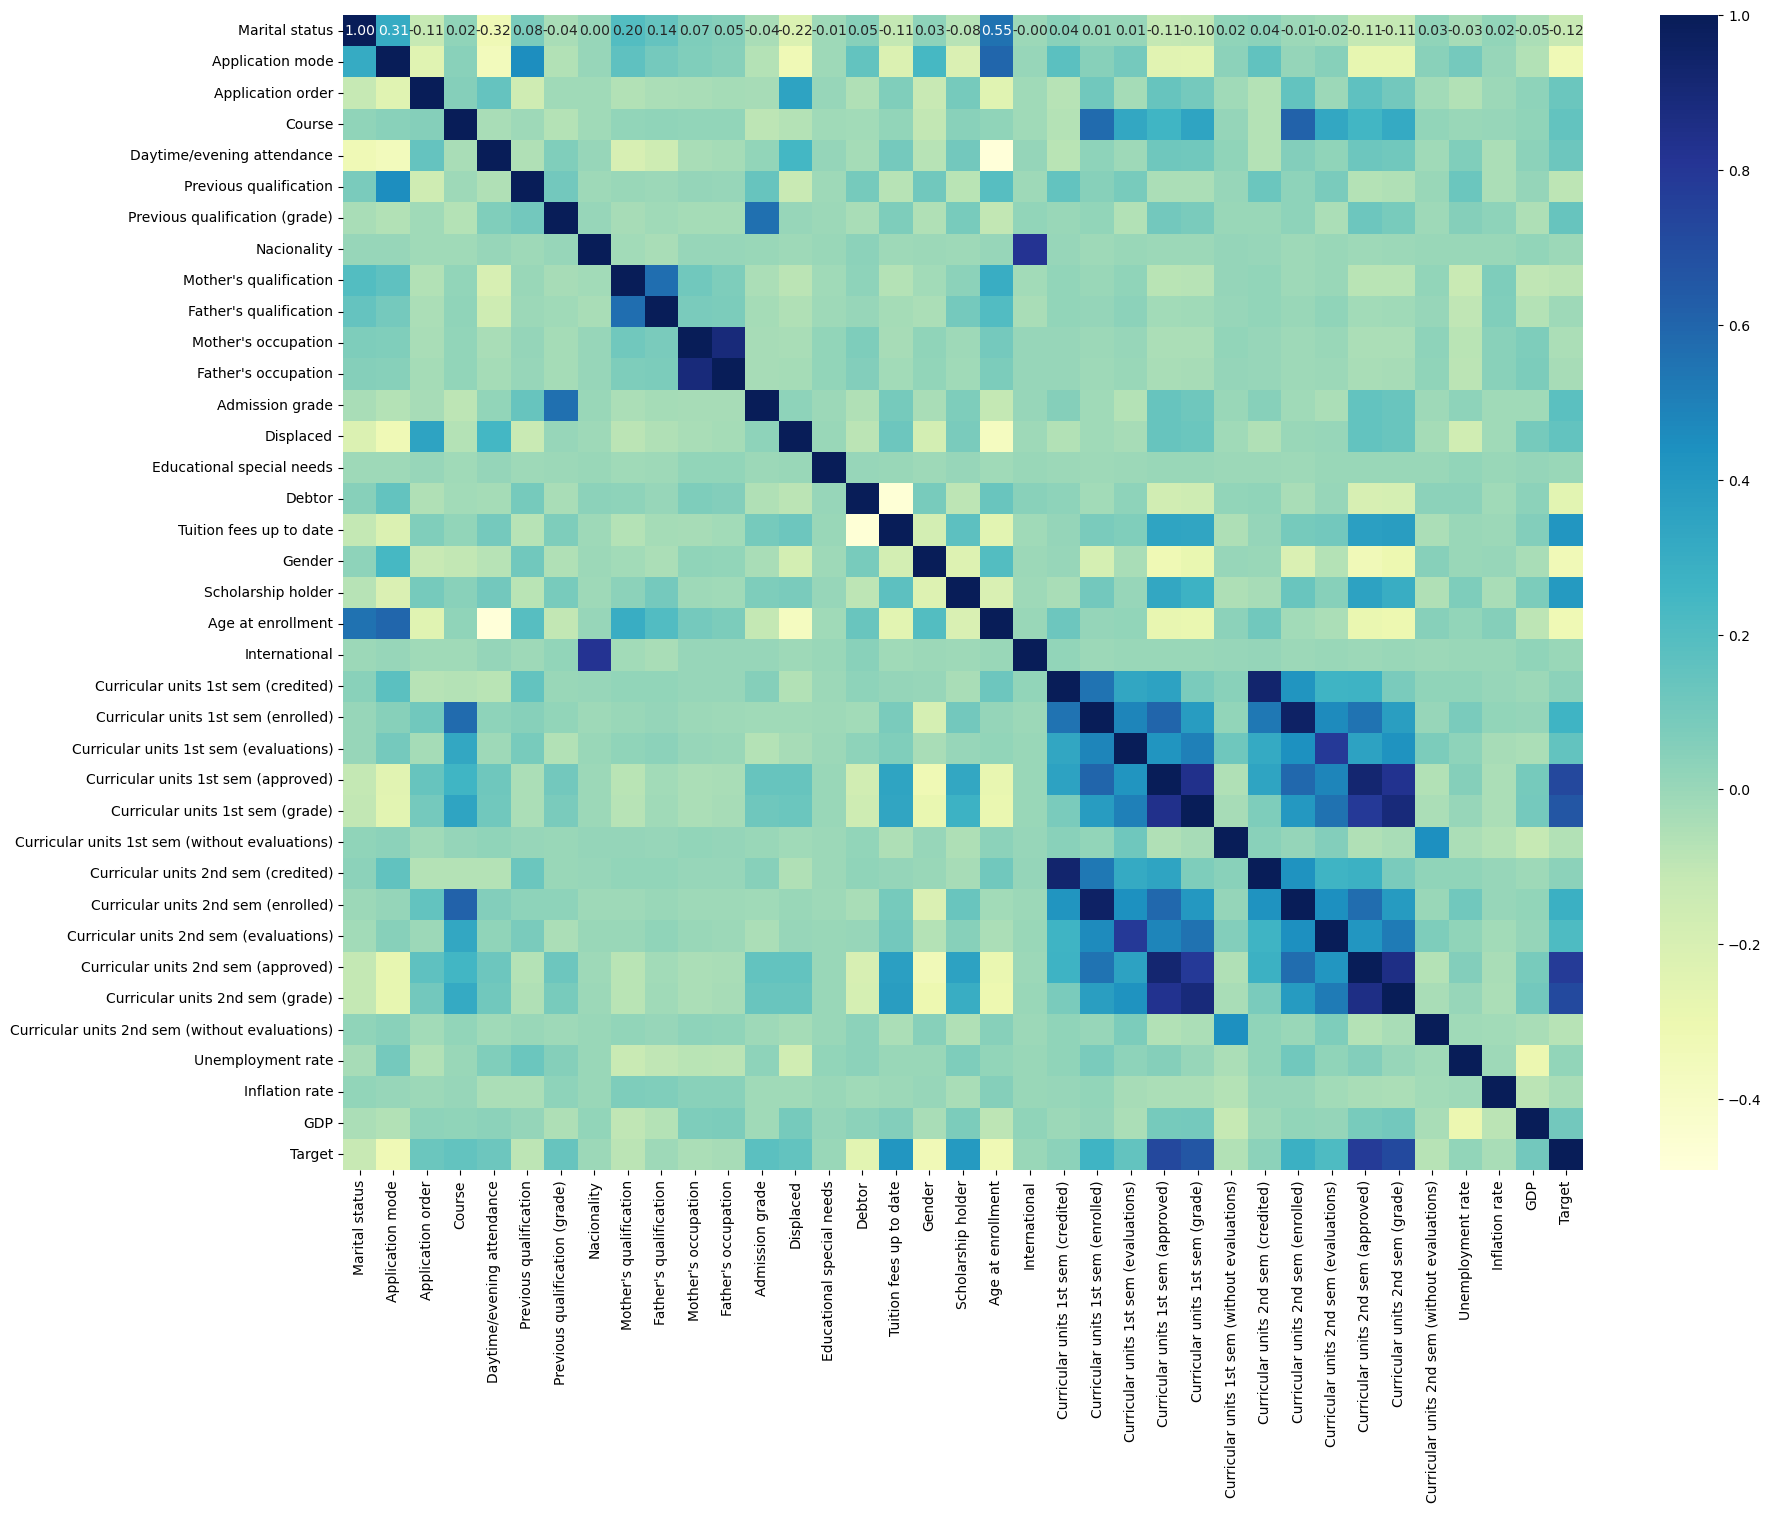

In [108]:
correlation_matrix = train.corr(numeric_only=True) # correlation matrix
plt.figure(figsize=(20, 15)) # set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f") # draw the heatmap
plt.show()

In [109]:
# drop the father's qualification and mother's occupation columns
train.drop(['Father\'s qualification', 'Mother\'s qualification'], axis=1, inplace=True)

In [110]:
# drop the nationality column
train.drop('Nacionality', axis=1, inplace=True)

In [111]:
# drop the international column
train.drop('International', axis=1, inplace=True)

In [112]:
# drop unemployed rate and inflation rate
train.drop(['Unemployment rate', 'Inflation rate'], axis=1, inplace=True)

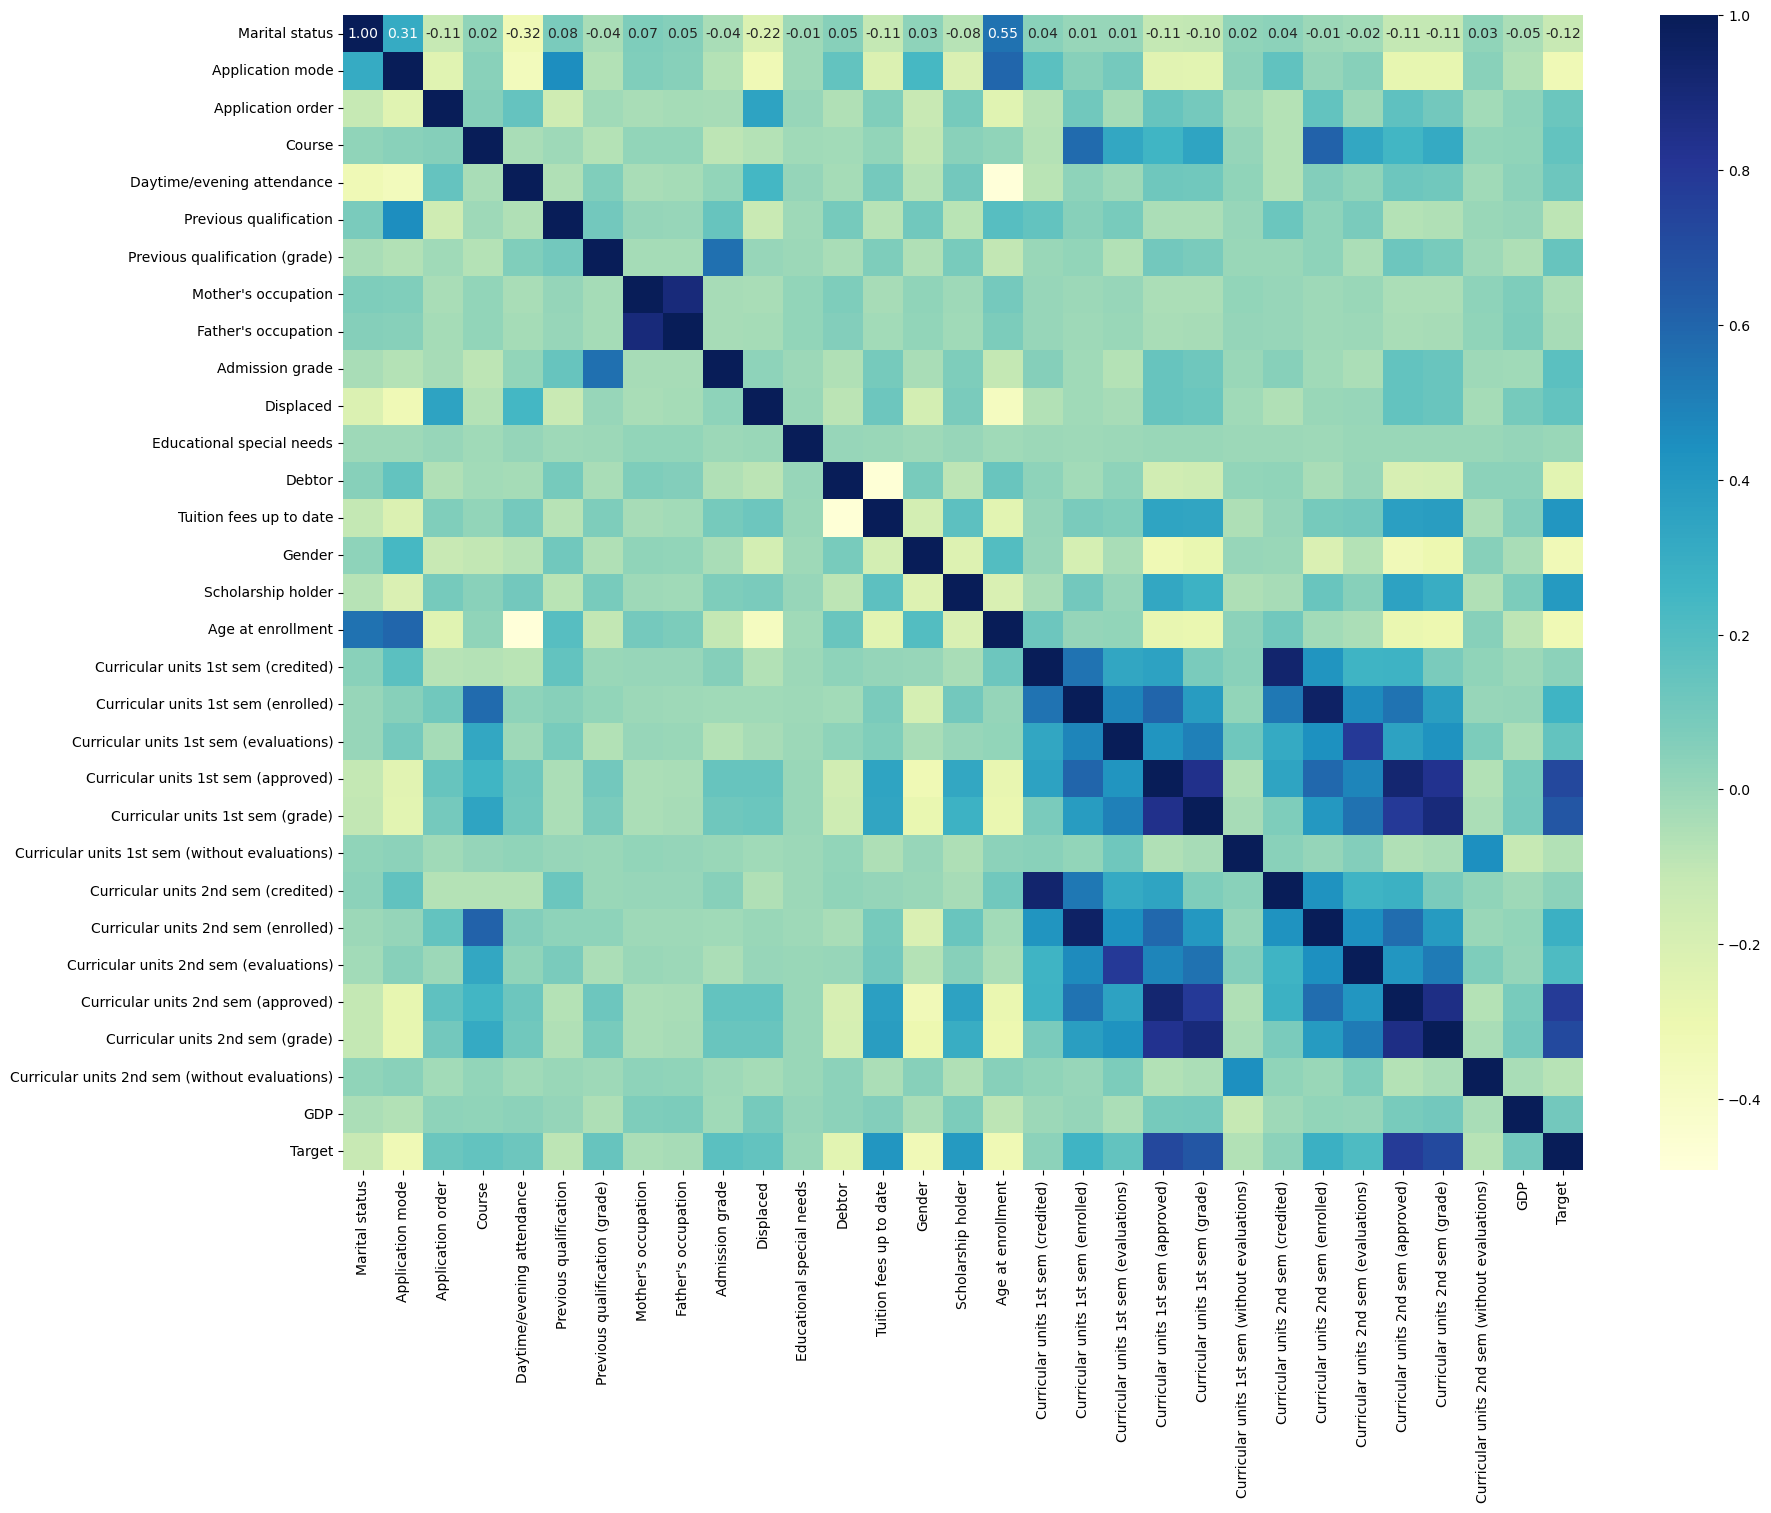

In [113]:
correlation_matrix = train.corr(numeric_only=True) # correlation matrix
plt.figure(figsize=(20, 15)) # set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f") # draw the heatmap
plt.show()

## 5 Feature engineering

In [114]:
# create a column of both curriculum units 1 sem and 2 sem
train['Total grade'] = train['Curricular units 1st sem (grade)'] + train['Curricular units 2nd sem (grade)']

In [115]:
# create a column of both curriculum units 1 sem and 2 sem
train['Total units'] = train['Curricular units 1st sem (approved)'] + train['Curricular units 2nd sem (approved)']

## 6 Data splitting

In [116]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = train.drop('Target', axis=1)
y = train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 7 Creating the model

In [118]:
# Create multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### 7.1 Training the model

In [119]:
# train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Random Forest trained.
XGBoost trained.
Gradient Boosting trained.


### 7.2 Evaluation

In [120]:
# evaluate the models
from sklearn.metrics import accuracy_score
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.77
K-Nearest Neighbors accuracy: 0.77
Decision Tree accuracy: 0.74
Random Forest accuracy: 0.83
XGBoost accuracy: 0.83
Gradient Boosting accuracy: 0.83


In [121]:
# use the best model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting accuracy: {accuracy:.2f}')

Gradient Boosting accuracy: 0.83


In [122]:
# evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



In [123]:
# save the model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

## 8 Test data

In [124]:
# load the test data
test = pd.read_csv('data\\test.csv')
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [125]:
test.shape

(51012, 37)

In [126]:
# display missing values
test.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

### 8.1 Dropping columns

In [127]:
# drop the father's qualification and mother's occupation columns
test.drop(['Father\'s qualification', 'Mother\'s qualification'], axis=1, inplace=True)

In [128]:
# drop the nationality column
test.drop('Nacionality', axis=1, inplace=True)

In [129]:
# drop the international column
test.drop('International', axis=1, inplace=True)

In [130]:
# drop unemployed rate and inflation rate
test.drop(['Unemployment rate', 'Inflation rate'], axis=1, inplace=True)

In [131]:
# drop the id column
test.drop('id', axis=1, inplace=True)

### 8.2 Adding columns

In [132]:
# create a column of both curriculum units 1 sem and 2 sem
test['Total grade'] = test['Curricular units 1st sem (grade)'] + test['Curricular units 2nd sem (grade)']

In [133]:
# create a column of both curriculum units 1 sem and 2 sem
test['Total units'] = test['Curricular units 1st sem (approved)'] + test['Curricular units 2nd sem (approved)']

## 9 Submission

In [134]:
# load the model
model = pickle.load(open('model.pkl', 'rb'))

# prediction
y_pred2 = model.predict(test)
y_pred2

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [135]:
y_pred2.shape

(51012,)

In [136]:
# start the id column with 76518
test.index += 76518

In [137]:
# create a submission dataframe
submission = pd.DataFrame({'id': test.index, 'Target': y_pred2})
submission.head()

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1


In [138]:
# unencode the target
submission['Target'] = submission['Target'].map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [139]:
# save the submission
submission.to_csv('submission.csv', index=False)